* importation de la bibliothèque pandas

In [1]:
import pandas as pd

* Chargement et affichage du fichier Titanic.csv

In [4]:
df=pd.read_csv("titanic.csv")

* Afficher le nombre de valeurs nulls pour chaque variable du DataFrame 

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Supprimer les observations dont la variable "Embarked" est nulle.  

In [11]:
df.dropna(subset=['Embarked'],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* Afficher dans la même figure les distribution des variables "Age" et "Fare". 

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>]], dtype=object)

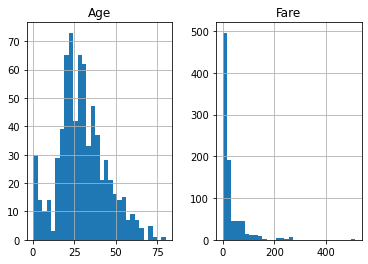

In [15]:
df[['Age','Fare']].hist(bins=30)

* Remplacer les valeurs nulles de chaque variable, par la valeur mediane. 

In [17]:
df = df.fillna(df.median())
df

C:\Users\amria\AppData\Local\Temp\ipykernel_7844\1571542190.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* Afficher de nouveau la distribution des variables "Age" et "Fare"

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>]], dtype=object)

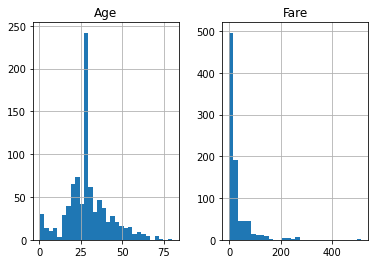

In [18]:
df[['Age','Fare']].hist(bins=30)

* Afficher la description de la variable "Age" et tracer sa figure de boxplot. 
* Vérifier l'existence de valeurs abbérantes

In [23]:
df.Age.describe()


count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: >

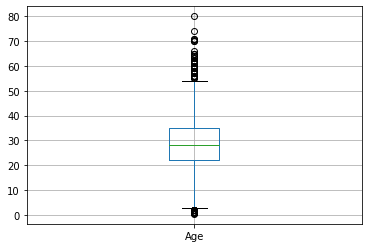

In [24]:
df.boxplot(column='Age')

<AxesSubplot: >

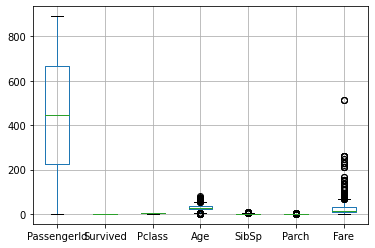

In [25]:
df.boxplot()

* Afficher les observations dont la variable "Age" est une valeur abbérante

In [30]:
q1=df.Age.quantile(q=0.25)
q2=df.Age.quantile(q=0.5)
q3=df.Age.quantile(q=0.75)
irq = q3 - q1
lower_limit = q1 - irq * 1.5
upper_limit = q3 + irq * 1.5

In [32]:
df2=df[(df.Age>upper_limit) | (df.Age<lower_limit)]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


* Afficher la description de la variable "Fare" et tracer sa figure de boxplot.
* Vérifier l'existence de valeurs abbérantes



In [33]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: >

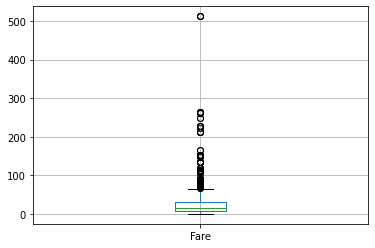

In [34]:
df.boxplot(column="Fare")

* Afficher les observations dont la variable "Fare" est une valeur abbérante.

In [35]:
q1=df.Fare.quantile(q=0.25)
q2=df.Fare.quantile(q=0.5)
q3=df.Fare.quantile(q=0.75)
irq = q3 - q1
lower_limit = q1 - irq * 1.5
upper_limit = q3 + irq * 1.5

In [36]:
df3=df[(df.Fare>upper_limit) | (df.Fare<lower_limit)]
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S


Afficher le nombre de male et female

In [37]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [38]:
df.groupby('Survived').apply(lambda x : x[x["Survived"]==1]).Sex.value_counts()

female    231
male      109
Name: Sex, dtype: int64

In [43]:
df.groupby('Survived').apply(lambda x:x[x['Survived']==1]).groupby('Sex').Age.mean()

Sex
female    28.532468
male      27.382294
Name: Age, dtype: float64

In [44]:
df.groupby('Survived').Age.mean()

Survived
0    30.028233
1    28.163735
Name: Age, dtype: float64